In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
#f3db : cut-off frequency
#forder: ordem do filtro
from scipy import signal
def func_filter(rt,f3db,Tstep,forder):
    fs=1/Tstep
    nyq = 0.5 * fs
    normal_cutoff = f3db / nyq
    b, a = signal.butter(forder, normal_cutoff, btype='low', analog=False)
    y = signal.lfilter(b, a, rt)
    return y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10


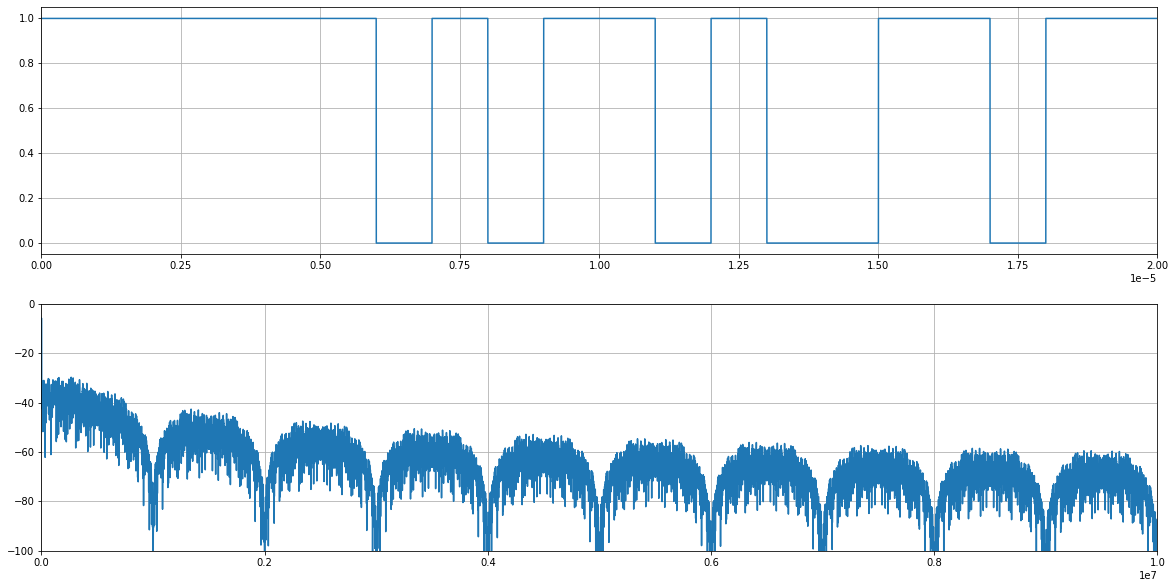

In [3]:
# bits
total_bits_dado = 1000
bits = []
for i in range(total_bits_dado):
  bits.append(random.getrandbits(1))

Rb=1e6 #bit rate em bps
T_s = 1/Rb # intervalo de bit (periodo por bit)
fs = 1000*(1/T_s)  #frequencia do sinal amostragem
num_amostras_por_bit = int(fs*T_s)

t = np.linspace(0, T_s*len(bits),num_amostras_por_bit*len(bits))

# NRZ Unipolar
A = 1   #amplitude do pulso
UNRZ = np.array([])
for i in bits:
  if i == 1:
    UNRZ = np.append(UNRZ, A * np.ones(num_amostras_por_bit))
  elif i == 0:
    UNRZ = np.append(UNRZ, np.zeros(num_amostras_por_bit))

##FFT dos sinais
N=len(t)
ST = np.abs(np.fft.fft(UNRZ))   
freqs = np.fft.fftfreq(UNRZ.size, 1/fs)
idx = np.argsort(freqs)
freqs=freqs[idx]
ST=ST[idx]/N

f=plt.figure(figsize=(20,10))
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)
ax1.plot(t,UNRZ)
ax1.set_xlim(0,20*T_s)
ax1.grid()

ax2.plot(freqs,20*np.log10(ST))
ax2.set_ylim(-100,0)
ax2.set_xlim(0,10*Rb)
ax2.grid()

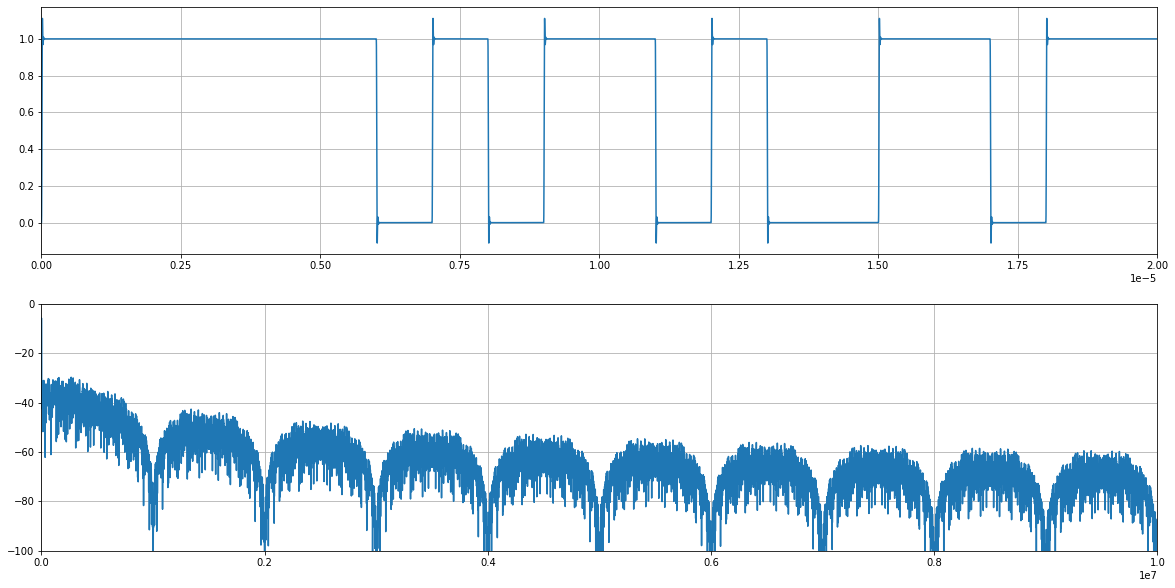

In [4]:
# parametros do cabo ethernet 
f3db = 50e6  # frequencia de corte
forder=4 # ordem
sinal_recebido = func_filter(UNRZ,f3db,1/fs,forder)

##FFT dos sinais
N=len(t)
SF = np.abs(np.fft.fft(sinal_recebido))   
freqs = np.fft.fftfreq(sinal_recebido.size,1/fs)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N

f=plt.figure(figsize=(20,10))
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

ax1.plot(t,sinal_recebido)
ax1.set_xlim(0,20*T_s)
ax1.grid()

ax2.plot(freqs,20*np.log10(SF))
ax2.set_ylim(-100,0)
ax2.set_xlim(0,10*Rb)
ax2.grid()


